In [4]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

SCHEDULE_T=1 #Clock des Schedulers 

#function to monitor the level of the different queues
def monitor(queue,monitor): 
    monitor.update({env.now: queue.level})
    return monitor

#scheduler takes packets from the queues according to the capacity of each user
def scheduler(env, users, SCHEDULE_T):
    
    counter=1 #counts the number of scheduling procedures
    alpha=-np.log10(0.01)/100
    
    while True: #größte Warteschlange wird auch bedient
        yield env.timeout(SCHEDULE_T) #for each ms the scheduling is active -> per TTI
        metric=np.array([]) 
        print(env.now)
        for i in np.arange(np.size(users)):
                  
            if(users[i].qos==1):
                metric=np.append(metric, (alpha*users[i].queue.level*(users[i].cp/users[i].mR)))  #list the metric of all UEs in the process 
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
            elif(users[i].qos==0):
                metric=np.append(metric,(users[i].cp/users[i].mR))
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
                
        sched_user=np.argmax(metric) #find UE with maximal metric that will be used for scheduling
        sched_size=(round(users[sched_user].cp)) #scheduling size according to the channel capacity of the user -> user gets full bandwidth for 1ms (1TTI)
        
        users[sched_user].mon= monitor(users[sched_user].queue,users[sched_user].mon)
        
        users[sched_user].mR=users[sched_user].mR+(1/counter)*sched_size
        counter=counter+1
        #print(users[2].mR)
        #print(users[2].cp)
        #print(env.now)
        users[sched_user].queue.get(sched_size)
        
            
class ue:
    def __init__(self,sinr,sinr2,cell1,cell2,env,qos):
        self.sinr=sinr
        self.sinr2=sinr2
        self.qos=qos
        self.cp=20000000*np.log2(1+np.power(10,sinr/10))/8000 #division by 8000 to determine number of bits that can be transmitted per TTI (1ms)
        self.cp2=20000000*np.log2(1+np.power(10,sinr2/10))/8000
        self.cell1=cell1
        self.cell2=cell2
        self.mR=0.1 #mittlere Rate
        self.queue=simpy.Container(env)
        self.mon={}
        self.metric=self.sinr+self.queue.level
        
    def rt_user(self,env):
        on_off=1
        counter=0
        while True:
            if(on_off==1 and counter<3000):
                self.queue.put(160) #20 bytes
                mon= monitor(self.queue,self.mon)
                #yield env.timeout(poisson.rvs(6, 1))
                #print('On Phase')
                #print(self.queue.level)
                counter=counter+20
                #print(counter)
                yield env.timeout(20) #every 20ms new packet
            elif(on_off==0):
                on_off=1
                #print('Off Phase')
                #print(self.queue.level)
                yield env.timeout(3000) #3s no packet to be sent
            elif(on_off==1 and counter>=3000):
                on_off=0
                counter=0
                #print('change from ON-OFF')
            
    def user_packets(self,env):
        while True:
            #print('o-user')
            self.queue.put(300)
            mon= monitor(self.queue,self.mon)
            yield env.timeout(poisson.rvs(5, 1))
    

##Ausführung der Simulation

env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list=np.append(ue_list,ue(15,5,'19','18',env,1))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))

ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))

ue_list=np.append(ue_list,ue(12,7,'19','18',env,0))


env.process(scheduler(env,ue_list,SCHEDULE_T))

env.process(ue_list[0].rt_user(env))
env.process(ue_list[1].user_packets(env))
env.process(ue_list[2].user_packets(env))

env.process(ue_list[3].user_packets(env))
env.process(ue_list[4].user_packets(env))
env.process(ue_list[5].user_packets(env))

env.process(ue_list[6].user_packets(env))
env.process(ue_list[7].user_packets(env))
env.process(ue_list[8].user_packets(env))

env.process(ue_list[9].user_packets(env))
env.process(ue_list[10].user_packets(env))
env.process(ue_list[11].user_packets(env))



env.run(until=10000)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-2-61e0087cd7d6>:31: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,(users[i].cp/users[i].mR))



568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817

2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804


4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764


6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685


8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385
8386
8387
8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518


In [127]:
u=np.array([3,4,6,2,6,2,7,2,7])
indices = (-u).argsort()[:5] # wählt die 5 UEs mit größter Metrik aus

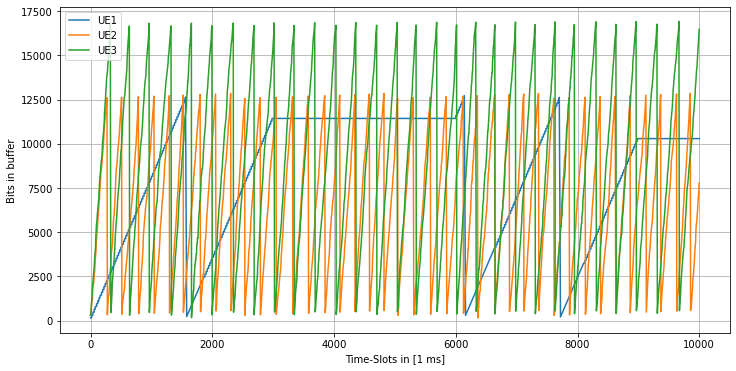

In [216]:
plt.figure(figsize=(12,6))
plt.plot(ue_list[0].mon.keys(),ue_list[0].mon.values(),label='UE1')
plt.plot(ue_list[1].mon.keys(),ue_list[1].mon.values(),label='UE2')
plt.plot(ue_list[2].mon.keys(),ue_list[2].mon.values(),label='UE3')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [16]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

SCHEDULE_T=1 #Clock des Schedulers 

#function to monitor the level of the different queues
def monitor(queue,monitor): 
    monitor.update({env.now: queue.level})
    return monitor

#scheduler takes packets from the queues according to the capacity of each user
def scheduler(env, users, SCHEDULE_T):
    
    counter=1 #counts the number of scheduling procedures
    alpha=-np.log10(0.01)/100
    
    while True: #größte Warteschlange wird auch bedient
        yield env.timeout(SCHEDULE_T) #for each ms the scheduling is active -> per TTI
        metric=np.array([]) 
        print(env.now)
        users[0].mon= monitor(users[0].queue,users[0].mon)
        users[1].mon= monitor(users[1].queue,users[1].mon)
        users[2].mon= monitor(users[2].queue,users[2].mon)
        
        for i in np.arange(np.size(users)):
                  
            if(users[i].qos==1):
                metric=np.append(metric, (alpha*users[i].queue.level*(users[i].cp/users[i].mR)))  #list the metric of all UEs in the process 
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
            elif(users[i].qos==0):
                metric=np.append(metric,(users[i].cp/users[i].mR))
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
        
        sched_user_list = (-metric).argsort()[:8] # wählt die 5 UEs mit größter Metrik aus #find UE with maximal metric that will be used for scheduling
        
        print(sched_user_list)    
        print(users[2].queue.level)
        
        for k in [0,1,2,3,4,5,6,7]:
            sched_user=sched_user_list[k]
            sched_size=(round(users[sched_user].cp/8)) #scheduling size according to the channel capacity of the user -> user gets full bandwidth for 1ms (1TTI)
            #users[sched_user].mon= monitor(users[sched_user].queue,users[sched_user].mon)
            users[sched_user].mR=users[sched_user].mR+(1/counter)*sched_size
            users[sched_user].queue.get(sched_size)
        counter=counter+1
        #print(users[2].mR)
        #print(users[2].cp)
        #print(env.now)

        
            
class ue:
    def __init__(self,sinr,sinr2,cell1,cell2,env,qos):
        self.sinr=sinr
        self.sinr2=sinr2
        self.qos=qos
        self.cp=0.7*20000000*np.log2(1+np.power(10,sinr/10))/8000 #division by 8000 to determine number of bits that can be transmitted per TTI (1ms)
        self.cp2=0.7*20000000*np.log2(1+np.power(10,sinr2/10))/8000
        self.cell1=cell1
        self.cell2=cell2
        self.mR=0.1 #mittlere Rate
        self.queue=simpy.Container(env)
        self.mon={}
        self.metric=self.sinr+self.queue.level
        
    def rt_user(self,env):
        on_off=1
        counter=0
        while True:
            if(on_off==1 and counter<3000):
                self.queue.put(160) #20 bytes
                mon= monitor(self.queue,self.mon)
                #yield env.timeout(poisson.rvs(6, 1))
                #print('On Phase')
                #print(self.queue.level)
                counter=counter+20
                #print(counter)
                yield env.timeout(20) #every 20ms new packet
            elif(on_off==0):
                on_off=1
                #print('Off Phase')
                #print(self.queue.level)
                yield env.timeout(3000) #3s no packet to be sent
            elif(on_off==1 and counter>=3000):
                on_off=0
                counter=0
                #print('change from ON-OFF')
            
    def user_packets(self,env):
        while True:
            print('normal ue')
            #print('o-user')
            self.queue.put(2000)
            #self.mon= monitor(self.queue,self.mon)
            yield env.timeout(poisson.rvs(500, 1))
    

##Ausführung der Simulation

env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list=np.append(ue_list,ue(15,5,'19','18',env,1))
ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))


for i in np.arange(0,300):
    ue_list=np.append(ue_list,ue(15,7,'19','18',env,0))


env.process(scheduler(env,ue_list,SCHEDULE_T))

env.process(ue_list[0].rt_user(env))
env.process(ue_list[1].user_packets(env))
env.process(ue_list[2].user_packets(env))

for i in np.arange(3,300):
    env.process(ue_list[i].user_packets(env))


env.run(until=10000)

normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue


<ipython-input-16-377fe1295c85>:35: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,(users[i].cp/users[i].mR))


[ 89 104 103 156  88 171 170 169]
544
55
[154 168 167 166 161 155 188 300]
544
56
[112   1   3   4   5   6   7 213]
544
57
[282  98  97 274  95  94  93  92]
544
58
[ 77 272  91  90 273 275  87 276]
544
59
[ 73 270 271 277 278 279 280 281]
544
60
[  0  79  78 269  76  75  74 283]
544
61
[  0 265 268  72  71  70  69  68]
544
62
[  0 227 228  67  66  65  64  62]
544
63
[ 59 225  63 226  61  60  58  57]
544
64
[ 55 223 224  56  54  53  52  51]
544
65
[222  37  38  39  41  42  43  44]
544
66
[ 47  33  34  35  36 221 220 219]
544
67
[208  29  30  31  32 218 217 216]
544
68
[100  25  26  27 187 215 214 212]
544
69
[102  21  22  23  24  49 210 209]
544
70
[ 20 186 185  45  46 184  48  50]
544
71
[ 17  28 211  19  18  16  15  14]
544
72
[ 13  12  11  10   9  40 287   8]
544
73
[293 289 288 151 191 190 189 183]
544
74
[302 172 173 174 175 176 177 178]
544
75
[204 201 200 199 198 197 196 195]
544
76
[297 205 203 202 299 298 194 206]
544
77
[140 179 180 181 136 182 193 192]
544
78
[207   0   2 105

[285  93 267 266 226 124 136  59]
544
320
[168 179 212 174 123  92 173  94]
544
321
[ 57 252 249 247 241  58 225 167]
544
322
[111  83 255 118 142 120 288 112]
544
323
[101 102  95 115 116  96  70 170]
544
324
[292 190  69 244 121 246 248 250]
544
325
[151 154 155 156 157 158 159 161]
544
326
[302 143 144 145 146 147 148 149]
544
327
[299 100 187  98 188 192 193 194]
544
328
[122 125 296  38  39  40  41  42]
544
329
[137 164 165 166  61  60 171 172]
544
330
[231 128 129 163 132  33  84 184]
544
331
[138 117 114 113 222 300 221 298]
544
332
[119 195 297 293  43  44  50 141]
544
333
[198  86 272 202  82  81  80  79]
544
334
[126 286 218 213 287 103 104 291]
544
335
[ 13 236 229 237  18  17  16  15]
544
336
[ 12 284 238 295   9  14 106 105]
544
337
[259 107 108 109 110 257 256 258]
544
338
[180 152  34  35  36 301 219 223]
544
339
[196 197 204  91  90  89  88  87]
544
340
[  0 275  49 274  56 273 271 205]
544
341
[  0 270 265 261 260  71 162 189]
544
342
[235 228 203 276 207 208 191 210]


[  0   1   3   6  22  27 131 130]
1088
normal ue
normal ue
normal ue
normal ue
normal ue
514
[  0  85  25 150 140  77   2 179]
1088
normal ue
normal ue
normal ue
normal ue
normal ue
515
[  0 240 234  37 178 233 232 230]
1088
normal ue
normal ue
normal ue
normal ue
normal ue
516
[  0 201 212 182 225 174 226 200]
1088
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
517
[  0 199 145 202 175 237 242  83]
1088
normal ue
normal ue
normal ue
normal ue
518
[  0 221 222 137 177 176 156  80]
1088
normal ue
normal ue
normal ue
normal ue
normal ue
519
[  0 113 195 119 157 139 142 143]
1088
normal ue
normal ue
normal ue
normal ue
520
[  0 172 171 168 167 165 164  57]
1088
normal ue
normal ue
521
[  0 132  69 134 135 136 144 146]
1088
normal ue
normal ue
normal ue
522
[  0 198 173 166 161 159 155 154]
1088
normal ue
normal ue
normal ue
523
[  0 121 123  61  60  58 128 120]
1088
normal ue
normal ue
524
[  0  42  43 193  92 190 188 187]
1088
normal ue
normal ue
normal ue
normal ue
525
[  0

[134  96 250 249 246 238 237 236]
1088
716
[115 266 116 201 255 252 113 233]
1088
717
[175 135 136 137 102 230 229 267]
1088
718
[ 92 154 145 167 176 157 198 199]
1088
719
[288 298 297 296 295 293 292 156]
1088
720
[285 284  14 272 302 142 143 144]
1088
721
[179 190 159  50 193 194 195 161]
1088
722
[151 124 123 121 120 119 118 117]
1088
723
[129  95  61  60  59  58  57 166]
1088
724
[128 172 171 170 168  93 221 222]
1088
725
[299 164 165  37  38  39  40  41]
1088
726
[300  80 141  42  43  44 139 132]
1088
727
[226  94  97 234  99 100 101 108]
1088
728
[ 98  83  84 225 110 111 112 114]
1088
729
[178 155 177  18  17 187 173 232]
1088
730
[188 184 212 182 163 158  70  33]
1088
731
[ 79 192 231 174  12 125 146   9]
1088
732
[103 104  86 126  82  81 261 185]
1088
733
[213  35  36 152 291 301 149 287]
1088
734
[ 16 258 235 109 264  15 122  13]
1088
735
[147 275 286 148 138 218 215  34]
1088
736
[257  75 207 208 245 210 263 214]
1088
737
[191  47  49 162  56  65  46  89]
1088
738
[189  45 27

[145 162 163 164 165 166 167 168]
1088
normal ue
965
[282 105 104 103 102  99  98  97]
1088
normal ue
normal ue
normal ue
966
[137 286 146 147 148 149 301 152]
3088
normal ue
normal ue
normal ue
normal ue
967
[134 300  96  95  93  92  91  89]
176
normal ue
normal ue
968
[ 69 222 224 170 225  88  87  86]
176
normal ue
normal ue
normal ue
969
[126 143 144 272 271 268 153 154]
176
normal ue
normal ue
normal ue
970
[277 218 281 280 123 247 125 127]
176
971
[110 139 141 142 245 244 243 242]
176
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
972
[238 287 290 198 199 202 204  84]
176
normal ue
973
[116 115 114 113 112 111 109 107]
176
normal ue
normal ue
normal ue
normal ue
974
[226  57  56  53  52  51 172  48]
176
normal ue
975
[227 240  81  80  79  72  70  68]
176
normal ue
normal ue
976
[221 230 229 171  83  82 175 176]
176
normal ue
normal ue
normal ue
normal ue
977
[233 234 267  29  30  62 232 231]
176
normal ue
normal ue
normal ue
978
[181 213  61  60  5

[193 201  26  68 215 198  73 196]
176
1145
[270 239 197 192 207  76 263 269]
176
1146
[187 127 131 133 188 189 190 276]
176
1147
[140   3 208 206 200 278 210 209]
176
1148
[251  66 211  77 214 130  75   2]
176
1149
[299 298 297 296 295 294 293  94]
176
1150
[ 46  49  50 100  56  36  37  47]
176
1151
[ 53  54  55  57 101 108  35 112]
176
1152
[151 261 260 259 252 250 248 115]
176
1153
[113 114  33  39  51  38 264 262]
176
1154
[302  41  40 274 124 172 279 226]
176
1155
[ 42 255 258 254  44  43 120 121]
176
1156
[ 16 224  17  15  14  13  12  11]
176
1157
[  9 273  10  52   8 275 266   5]
176
1158
[ 63  89  93 288  95  96  48  99]
176
1159
[105 107 271 145  18 272 292 291]
176
1160
[ 87  88 122 111  64 123  84  86]
176
1161
[125  92 109  69 110 119 257 129]
176
1162
[243  91 242 126 244 245 170 168]
176
1163
[287 222 171  65 235 146  67 238]
176
1164
[286 117 118 281 233  98  97 128]
176
1165
[221 280 162 220 160 155  60  61]
176
1166
[148 116 139 137 134 290 195 265]
176
1167
[ 71 216 15

[  0 205 289  85  20   7 104 285]
176
1345
[  0  75 185 186 203 209 210 130]
176
1346
[  0   2 229 227 225  24  23 223]
176
1347
[  0 222  19 219 217 211 202 196]
176
1348
[  0 213  34 286 214 179  86 181]
176
1349
[ 0 31 32 44 45 48 68 69]
176
1350
[  0  71 184  70 180  26  27  28]
176
1351
[  0  18 235 236 126 116 109 107]
176
1352
[  0  87  88 193  83  82 192  30]
176
1353
[  0  79  76 230 215 195 194  29]
176
1354
[  0 187 292  25 212   9   8 188]
176
1355
[  0   1 300   3   4   6  99 100]
176
1356
[  0 233 102  98  94  89  80  77]
176
1357
[  0 173  90 172 171 243 244  85]
176
1358
[  0  58  56  55  54 207  52 206]
176
1359
[ 0 78 74 73 67 66 65 64]
176
1360
[  0 197 198 200 201 205 208 218]
176
1361
[177 191 174 170 220 221 224  41]
176
1362
[276 260  22 175 279 278 176 189]
176
1363
[ 49 105  50 270 232  72  63 190]
176
1364
[ 61  42 261 106  59  60  62 178]
176
1365
[288 284 287 289 290 293  46 291]
176
1366
[ 43 299 298 297 296 295 294 168]
176
1367
[ 53 255 252 250  33 245 12

[ 88  32  33  34 268  93 189 233]
720
1526
[197 208  41 209 210  49  50  51]
720
1527
[247 111 112 113 242 119 237 235]
720
normal ue
1528
[249 101 105 106 110 234 232 248]
720
normal ue
normal ue
normal ue
normal ue
normal ue
1529
[201  90  25  89 292 291 290  31]
720
normal ue
normal ue
1530
[153 253 275  62  61  60  59 276]
720
normal ue
1531
[190 255 198  69 258  66 207 261]
720
normal ue
1532
[ 21  52 202 279 218 231  22  20]
720
normal ue
normal ue
normal ue
1533
[  9  16  15 191 199  12 147 185]
720
normal ue
normal ue
normal ue
normal ue
1534
[ 95  92  91 146 204   6   8  78]
720
normal ue
normal ue
normal ue
1535
[ 81 134 132 129 182 183 186 188]
720
normal ue
normal ue
normal ue
normal ue
1536
[ 17   5 302 175 133 176 131 130]
720
normal ue
normal ue
normal ue
1537
[167  35 160  37  39  40 301 177]
720
normal ue
normal ue
normal ue
normal ue
1538
[264 252 251  36  75 163 205 203]
720
normal ue
1539
[159 174 267 170 169 168 135 137]
720
normal ue
1540
[140  38 164 139 136 166 

[  0 222 214 213 189 188 136 129]
720
1726
[  0 227 224 223 127 126 125 124]
720
1727
[  0 230 229 228 121 120 116 114]
720
1728
[  0  58 296 293 292 290 289 288]
720
1729
[  0 283  34  41  59  62  65 102]
720
1730
[  0 103 104 105 106 107 233 234]
720
1731
[  0 299 263 254 253 252 251 250]
720
1732
[  0 248 247 245 238 235  33  31]
720
1733
[  0 302  22 123  25 122 109 101]
720
1734
[ 0 45 47 48 84 86 95 96]
720
1735
[  0  97  99 100  21  20  19  18]
720
1736
[  0 159 242 243 244  44 258 261]
720
1737
[  0 256 264 279 262   3 287   1]
720
1738
[  0   4  43 257 152 149  88  87]
720
1739
[151  46 266 259   0   2 153 172]
720
1740
[  0 113 282 117 280 278 118 276]
720
1741
[  0 143 142 134 275 274 272 294]
720
1742
[  0  24 155 301  74 270 267 132]
720
1743
[  0 131 112 128  16  15  14  13]
720
1744
[  0 192 119 115 111 226  94  93]
720
1745
[  0 298  17  73  23  12  11  10]
720
1746
[  0 173 295 255   8   7   9 297]
720
1747
[  0  75  98 205 200 108 273 133]
720
1748
[  0 141 171 164   

[102 237 236 122 221 223 279 234]
720
normal ue
1932
[247 101 103 104 238  86  84  25]
720
1933
[ 45  47  50 248 245 287 161 125]
720
normal ue
1934
[ 76 220 124  43  44  22 235 224]
720
normal ue
normal ue
1935
[  1   3   4 233 206  96  95 151]
720
1936
[262 258  87  55  54 219  53  52]
720
normal ue
normal ue
1937
[149  78 228  81  21  20  19  18]
720
normal ue
normal ue
normal ue
1938
[230 243 123 244 109 257 229 242]
720
normal ue
normal ue
1939
[ 51  82 162 152  48 147 139 227]
720
1940
[259 256 266 261  46 100  99  97]
720
normal ue
normal ue
normal ue
1941
[ 88   2 141 298 164 148 300  17]
720
1942
[150 154 232   6 119 171  61  63]
720
normal ue
1943
[ 89  94  90 173  98  75  73  91]
720
1944
[ 71  68 255 131 133 128  92 134]
720
normal ue
1945
[260 118 117 113 112  93 274 203]
720
1946
[ 23  24  26 205 272 271 202 199]
720
normal ue
1947
[268 142 269 273 278 172 267 196]
720
1948
[ 16 294 295 115  15  14  13 143]
720
normal ue
normal ue
normal ue
1949
[275 197  64 280 108 200 1

[245 261 262 264 266  50  53  54]
1264
2123
[228 279  55  59 240  66  70  79]
1264
2124
[215  83 258 253 221 218 283 214]
1264
2125
[216 252 114 254 109 107 217 248]
1264
2126
[244 105 241 246 104 247  80  81]
1264
2127
[ 86 145 259  33 263  84 183 222]
1264
2128
[163 167 257  72 162 235 127  87]
1264
2129
[256 186 187 188 189 102 229 230]
1264
2130
[146 190 191 243  37  38  39  40]
1264
2131
[ 19 238 182 152  99 209 206  22]
1264
2132
[ 78 160  76  77  21  20  82  18]
1264
2133
[204  65 195 135  62  41 159   4]
1264
2134
[  1   3   5 201 175 129 125 122]
1264
2135
[147  48  46  45 220 116 219 101]
1264
2136
[138  97 100  47 242  43  42 139]
1264
2137
[ 32 174 149  88   2  71 141 117]
1264
2138
[294  13 295 271 275 276 119 278]
1264
2139
[118  68  73  75 205 164 200 199]
1264
2140
[  0 232  56 274 202 272 154 196]
1264
2141
[  0 268  89  94 260 128 132 134]
1264
2142
[  0 173 198 171  26 157  23 150]
1264
2143
[  0  17  16  15  14 148  24 133]
1264
2144
[  0 300 298   6 277 269 267  57

[  0  80 109 110 167 246  19  18]
1264
2320
[  0 207 206 152 126 124 103  95]
1264
2321
[302 208  87  34  35  81  37  38]
1264
2322
[279 286 287 288 289 290 291 292]
1264
2323
[ 76  72  78  79 299 293 284 241]
1264
2324
[ 41 296  39  40  44 210 283 248]
1264
2325
[263 285 151  65  70  77 160 162]
1264
2326
[247 224 222 221 183 182 191 190]
1264
2327
[163 209 201 212 213 214  32  54]
1264
2328
[262 161 243  42  55  59  62 227]
1264
2329
[ 47 102 233 211 229 228 159  43]
1264
2330
[ 66 266 195 101 147  45  46 234]
1264
2331
[245  97 181 230 187 100 188 179]
1264
2332
[219 220  52  53 218 217 216 215]
1264
2333
[261 177 204 242 116 194 122  48]
1264
2334
[264 174 149  50 139 138 137 136]
1264
2335
[186 129 189  88 135 175 125 146]
1264
2336
[  1   3   4   5   2 269  60  56]
1264
2337
[202 148 141 200  94  93 272 276]
1264
2338
[193 203 205   6 154 173 298 300]
1264
2339
[196 301 281 119 150 278 275 198]
1264
2340
[144  64 267  61  68 268  23 134]
1264
2341
[ 89  63 199  92  17  16  15  75

[162 238 240 279  39  42  43 136]
352
normal ue
normal ue
normal ue
2523
[ 19 296 182 218 220 264 293  55]
352
normal ue
2524
[195  59 183 217 181 190  53 103]
352
normal ue
normal ue
normal ue
2525
[243 189  95 289  52 102   4   3]
352
normal ue
normal ue
2526
[  1   5 159 261 186 116 175 174]
352
normal ue
normal ue
2527
[161 194  45  34  48  32  50  66]
352
normal ue
normal ue
normal ue
2528
[219 129 137 138 125 139 288 287]
352
normal ue
normal ue
normal ue
2529
[146 245 160 147 122 101 242  76]
352
normal ue
2530
[149 177 204   2  94 154 141 148]
352
normal ue
2531
[272 196 134  93 193 200 267 173]
352
normal ue
normal ue
2532
[205 300 298 276 202   6 203  68]
352
2533
[198 295 294 268  23 281 144 133]
352
normal ue
2534
[199 275 274 156 271 270 269  56]
352
normal ue
2535
[ 60  89 265 171 150 170 255  67]
352
normal ue
2536
[ 91 226 117 115 108 232  75 132]
352
normal ue
normal ue
normal ue
normal ue
2537
[ 61  64 169 164  98  92  90  28]
352
2538
[  8 278  14  74 119  10   9 301

[  0 194 160 220 221 107 231 233]
352
2723
[  0   1  62   3   4  72  29 239]
352
2724
[  0  47 190 204 138 139  66  53]
352
2725
[  0  52  50  48 287  34  32 146]
352
2726
[  0  55 161 137 129 125 101 219]
352
2727
[  0 245 242  76 288 293 217 289]
352
2728
[  0  45 149 177   2 148  68 276]
352
2729
[  0 141 200 202 203 205 196 193]
352
2730
[  0 300 298   6  93 173 272 154]
352
2731
[ 0 75 71 94 98 63 61 57]
352
2732
[  0 133 268 166  56 197  23 108]
352
2733
[  0 260  21 255 112 111 150  20]
352
2734
[  0 278  17  16 143   7 270 294]
352
2735
[  0 295 199  74 165 169 170 171]
352
2736
[  0  92 267 184  91  90  89 132]
352
2737
[  0 113 265 269 271 273 274 277]
352
2738
[  0  67  60 226 225 128  73 198]
352
2739
[  0  64 172 158 156 155 301 232]
352
2740
[  0 119 117 115 275 280 281 131]
352
2741
[ 14  15  13  12  11  10   9 282]
352
2742
[118   8 144 134  24 164  69  28]
352
2743
[ 27 145  41 153  26 124  82 123]
352
2744
[152 222 114 243 210 142 109 147]
352
2745
[157 297 292 151 16

[171 117   8   9  10  11 115  51]
352
2937
[ 39 212 181  85  84 206 201  37]
352
normal ue
2938
[204  38 230  52 223 225 144 210]
352
normal ue
normal ue
normal ue
2939
[ 86  70 100 226 135 187 185 183]
352
normal ue
normal ue
2940
[ 83 169  53 124 120 126 130  18]
352
normal ue
normal ue
2941
[123  54 232  80  79  82 180 106]
352
2942
[227 104 222 221 220 219 218 101]
352
normal ue
normal ue
2943
[ 14 140 139 195 216 138 122 121]
352
2944
[ 78 299 165 296 293 290 103  97]
352
normal ue
2945
[ 87  13  96 261  88  95  72  76]
352
normal ue
normal ue
2946
[188  35  36  46  47  48  55  58]
352
normal ue
2947
[179  77 164 172 186 182 229 228]
2352
normal ue
normal ue
2948
[151  26  27  28  33  34  64 231]
896
2949
[302  24  25 248 247  69 297 243]
896
normal ue
2950
[288 264 279 283 235 234 233  15]
896
normal ue
2951
[285 224 217 286 244  22 284 263]
896
normal ue
2952
[266  12 241   1  66   3   4   5]
896
normal ue
normal ue
2953
[107 238 237 215  59  29  30  31]
896
normal ue
normal ue


[  0  29  30  31 192 211 213 219]
896
3132
[  0 224  27  26   5 302   4   3]
896
3133
[  0 297 284 247 244 238 236 235]
896
3134
[  0   1 234 151 146 168 287 174]
896
3135
[  0 262 127 239 190 191 194 258]
896
normal ue
3136
[  0 163 167 177 178 208 176 207]
896
3137
[  0 110 149   2 300 298   6  71]
896
normal ue
3138
[  0 148  23 197  63 193 196 278]
896
3139
[  0 108  68 141 154 205 272   7]
896
3140
[  0  56 166 276 173 133  93 203]
896
3141
[  0 260 200  98  75 111  61  57]
896
normal ue
3142
[  0 202  20  21 268  16  17 295]
896
3143
[  0 270 294 271 269 265 143 184]
896
3144
[  0 199 150  94 132  74 267 273]
896
3145
[  0 112 170 131 128 277 255 274]
896
normal ue
3146
[  0  60  89 113 118 275 282 119]
896
3147
[  0  90 198  73  67  91 280 281]
896
3148
[  0 134  92  51 230 225 223 206]
896
3149
[  0 171 204 201 101 102  11  10]
896
3150
[  0 117   9   8 103 115 296 299]
896
3151
[  0 293 195 210  86  85 212  80]
896
3152
[  0 123 106 105 104  96  78 181]
896
3153
[  0 240 237 2

[  0 263 279 285 286 289 284 292]
896
3340
[  0   1 297   3 291  65  69  70]
896
3341
[  0  30  48  72  77  80  82 145]
896
3342
[  0 245 239 236 235 234 214 213]
896
3343
[  0 211 192 159 158 146  29  26]
896
3344
[  0  19  15  13  12 151 302   4]
896
3345
[ 0  5 33 45 46 47 49 50]
896
3346
[  0 238 100  99 244  86  85  81]
896
3347
[  0  76  32  31 262 137 139 162]
896
3348
[  0 194 207 287 288 191 163 188]
896
3349
[  0 147 160 161  40  42  43  44]
896
3350
[  0  59  62  64  66  34 187 178]
896
3351
[  0 186  27 177 176 174 208 168]
896
3352
[  0 172 167 149 142 283  41 110]
896
3353
[  0   2  71 148   6  23 298 300]
896
3354
[  0 154 141 166  63  68 272 276]
896
3355
[  0 108  93 133 173  56 193 197]
896
3356
[  0 205 203 196 278 260   7 268]
896
3357
[  0 202 294 200 270 150  57  61]
896
3358
[  0  21  20  17 269  16 255  74]
896
3359
[  0 271 111 112  98 273  94  75]
896
3360
[  0 128 295 199 267 265  60 184]
896
3361
[  0 277 132 274 143 170 131 119]
896
3362
[  0  89  90  91 11

[  0 135 171 185  95 201 204 206]
1440
normal ue
normal ue
3533
[  0 156 157 162 164 165 169 179]
1440
normal ue
normal ue
3534
[  0 209 189  54 297 242 236 231]
1440
normal ue
normal ue
normal ue
3535
[  0 230 225 218 144  10   9   8]
1440
normal ue
3536
[151 212 195 183 181 180 104 103]
1440
normal ue
3537
[302  48  49  50  51  52  53  55]
1440
3538
[  1   3   4   5 245 222 254 256]
1440
normal ue
normal ue
normal ue
normal ue
3539
[101 258  25 221 293 259  31  32]
1440
normal ue
3540
[241  35  37 286 217 216 215 214]
1440
normal ue
normal ue
normal ue
3541
[ 76 102 279  97  96 257 292  13]
1440
normal ue
normal ue
3542
[291  12  11 233 252 296 213  87]
1440
3543
[235  88 152  99 246 285 301 284]
1440
3544
[253  78  77 153 155  72 234  70]
1440
normal ue
normal ue
3545
[130  30 249 211 210  36 228 140]
1440
normal ue
normal ue
3546
[ 38 263  39 175  85 244 226  86]
1440
normal ue
normal ue
normal ue
3547
[240 160 261 114 159 158 262 147]
1440
normal ue
normal ue
normal ue
3548
[299 2

[  0 245 226 221 218  22 254 256]
1440
3734
[  0   4 213 259   8   9  10 264]
1440
3735
[  0  15 209 153 155 156 157 158]
1440
3736
[151 145 146 147 152 159 160 162]
1440
3737
[302 114  95 235  88  86  85  82]
1440
3738
[204  79 190 191 192 194 201  80]
1440
3739
[120 125 122 121  66 117  34  35]
1440
3740
[185 115  36 189  87  42  43 116]
1440
3741
[164 126  54 262 135  58 285  51]
1440
3742
[171  44  45 144 292 293  65 279]
1440
3743
[139 234  70  69 181 187  55  53]
1440
3744
[258  46  49  72  76  77  78 253]
1440
3745
[178 284 103 286 287  52 288 102]
1440
3746
[165  39 175 215 169 168  48 167]
1440
3747
[252 296 291 290 299 163 179 182]
1440
3748
[297 248  33 232 210 233 249 244]
1440
3749
[240 188 241 195 214 289 216  37]
1440
3750
[246 142  96 137  25 211  29  30]
1440
3751
[ 31 217 207 124 263 261 140  50]
1440
3752
[180   1 228   3 227   5 104  14]
1440
3753
[ 13 301  11  12 129 109 130  41]
1440
3754
[101 127 183 123  38  19  18  97]
1440
3755
[138 266  64  99 212 177 257  47

[288 178 175 179 120 228 229 234]
1440
normal ue
normal ue
3940
[302 116 117 121 122  58 249 124]
1440
normal ue
3941
[187 104 103  31 285 102  34  35]
1440
3942
[134 105  53 107  51 109 146 195]
1440
normal ue
3943
[129  78  77 279 277 171 125 185]
1440
normal ue
normal ue
3944
[189 262 194  43  44  45 290 191]
1440
normal ue
normal ue
3945
[ 13 296  95  80  14  22 284 293]
1440
normal ue
3946
[140 126 114  24  25  26 190  28]
1440
normal ue
3947
[ 38  37  99 289 113 115 291 297]
1440
3948
[127  29 145 135 235 299 257 142]
1440
normal ue
normal ue
normal ue
3949
[225 144 222 286  30  36 263  39]
1440
normal ue
normal ue
3950
[223 147 301 123 287 152 153 155]
1440
normal ue
3951
[ 87 212 211 160  88  41 214 207]
1440
normal ue
normal ue
normal ue
3952
[227  96 217 216  86 137  85 139]
1440
normal ue
normal ue
normal ue
3953
[ 76 261 138  46  47 246  50 266]
1440
normal ue
3954
[ 54  97  18 180 101   5   1  79]
1440
3955
[172  64  19  52 106 130  48 161]
1440
normal ue
normal ue
normal 

[  0  75 112 271 273 143 111 132]
528
normal ue
4127
[  0  40 232 231 230 280 119 281]
528
4128
[  0 240 239 236  42 213  49 241]
528
normal ue
4129
[  0  73  72 164  67  66  65 165]
528
4130
[  0 242 221   4 184 267 208 206]
528
4131
[  0 204 201 192 188 182 181 179]
528
4132
[  0  33 233 226 219 218 215 209]
528
normal ue
4133
[  0 162  55  69 198 248 254  32]
528
normal ue
4134
[  0  89  90  91  92 118   8  15]
528
4135
[  0 264  10 274  60 282 275 256]
528
4136
[ 30  31 243 244  34 252  82 253]
528
4137
[ 88  29 120 210 195  35  36  37]
528
4138
[302 247 245 235 234 229  78 222]
528
4139
[151 116 115 114 178 109 107 105]
528
4140
[249 293 292 289  38  39  43  44]
528
4141
[144 277 263 262 279  45  53 104]
528
4142
[296  80 187  77 140 299 297 288]
528
4143
[147 286 287 155 157 158 159 160]
528
4144
[121 291  25 146 265 163  70 167]
528
4145
[185 117  22  24 259 122 124 125]
528
4146
[145 285 284 171 169 168 189 190]
528
4147
[290 134 135 123 142 258 175 191]
528
4148
[ 99  14 194  

[  0  57 276 272 270 269 294  74]
528
4324
[  0  17  16  20  21 128 173 170]
528
4325
[  0  93 255  98 131 273 199 271]
528
4326
[  0 143 111  75  94 295 132 119]
528
4327
[  0 112  40  42 181 241 240 239]
528
4328
[  0 280 230  49 281 232 236 231]
528
4329
[  0 215 213 118  66  65 208  67]
528
4330
[  0 206   4 204 201  82  80  73]
528
4331
[  0 248 247 242  72 159  88  99]
528
4332
[  0 188 187 185 184 182 179 178]
528
4333
[  0  58 267 117 120 121 122 123]
528
4334
[  0 175 165 164 163 162 160 157]
528
4335
[  0 158  69 189 190 191 192 198]
528
4336
[134 114 115 116 145 144 142 140]
528
4337
[222 219 221 155 301 223 210 209]
528
4338
[254 225 252 253 125 256  55 257]
528
4339
[ 53 218 109 258 259 262 263 264]
528
4340
[102  34  36  37  38  39 277 275]
528
4341
[153 299 297 296  77  78 152  89]
528
4342
[151 180 176 172 171 169 168 167]
528
4343
[302  86  85 214 216 217  76 226]
528
4344
[265  35  43  44  45 274 211 126]
528
4345
[291  25  26 107  28  29  30  31]
528
4346
[103 289 12

[  0  20 273  98  94 295 268 199]
1072
normal ue
normal ue
4526
[  0  75 111 143 271 131 239 236]
1072
normal ue
4527
[  0 213  67  66  65 225  58 230]
1072
4528
[  0 119 112  80 201 240 241 280]
1072
normal ue
normal ue
normal ue
4529
[  0 132 281   4  42  49 248 247]
1072
normal ue
normal ue
4530
[  0 242 232 231 215 206  72  73]
1072
normal ue
normal ue
4531
[  0  99 159 160 162 163 165 103]
1072
normal ue
4532
[  0 118  39  40 117 116  46 113]
1072
4533
[  0  28 121 208 204 188 187 181]
1072
normal ue
normal ue
4534
[  0 301  88 267  82 189 158 198]
1072
normal ue
4535
[  0  24  25 172 144 142 140 284]
1072
normal ue
4536
[139 105 107 120 122 123 286 287]
1072
normal ue
normal ue
normal ue
4537
[134 115 114 157  37  78 264 263]
1072
normal ue
normal ue
4538
[137 135 127  14  13 290  15 299]
1072
normal ue
4539
[297 296 293 102 182 258 104 256]
1072
4540
[153  69  70 176 164  29 178 155]
1072
normal ue
normal ue
4541
[302 191 192 194 210 211 212 214]
1072
normal ue
normal ue
normal 

[  0 193 166   7 294 154 295 255]
1072
4723
[  0 150 141 133 128 278 276  98]
1072
4724
[  0  94  93  68 260 268 269 270]
1072
4725
[  0  74 272  20  21  17  16 200]
1072
4726
[  0 143 131 111 239  75 271 236]
1072
4727
[  0 172 201  99 181  41  51  46]
1072
4728
[  0  58 240  65  73 228  80 225]
1072
4729
[  0 192 191 190 188  82  49  88]
1072
4730
[  0 206 204  40 112 163 162 165]
1072
4731
[  0 168 105 103 179 182 184 185]
1072
4732
[  0  26 147 301  30 155 157 159]
1072
4733
[  0 187 189  90  89 207  87  86]
1072
4734
[  0 146 248  77 242 142 241  24]
1072
4735
[  0 139 138  72  67  66 244 245]
1072
4736
[263 158 160  39 119 121 122 123]
1072
4737
[243 249 252 253 254 256 113 259]
1072
4738
[ 43 247 167  55 164 261 107 153]
1072
4739
[302  85 210 211 213 214 215  78]
1072
4740
[152 246 132  70 134 135 266 117]
1072
4741
[144  76 233 234 235 178 145 124]
1072
4742
[281  31  32  33  34  35  36  37]
1072
4743
[126 287  28  29 286 284 280  38]
1072
4744
[118 285 127 274 267 130 137 140

[  0 172 248  73  41  53 259 256]
1072
normal ue
normal ue
4933
[  0 189  86 190  88  66 244  72]
1072
normal ue
normal ue
4934
[  0 122 121  30 281 119 117 184]
1072
4935
[  0 242 241  39 123 104 245 124]
1072
normal ue
4936
[ 77 287 286 254 252 249 246  82]
1072
normal ue
normal ue
4937
[160 188 198 207  29  31  32  33]
1072
normal ue
4938
[171 107 288 289 290  15  14 158]
1072
normal ue
normal ue
normal ue
normal ue
4939
[156   4 296 187 145 155 253  42]
1072
normal ue
4940
[185 274 182  43 180  28  38 159]
1072
normal ue
normal ue
4941
[267  67  87 219  85 178 179  69]
1072
normal ue
4942
[216 231 118 227 226 221 218 217]
1072
normal ue
normal ue
4943
[208 126 214 120 116 127  96 125]
1072
normal ue
4944
[215  89  78  76  60  55  54  97]
1072
normal ue
4945
[299 297 292 229 235  35  36  37]
1072
normal ue
4946
[ 92 247 243 115 234 233 129 230]
1072
4947
[ 70  45  44 100  91  90 222 223]
1072
normal ue
4948
[130  22 261 258  25 257  27 132]
1072
4949
[151 140  95 211 101 102 106  47

[  0 141 269 268  56  61  68  74]
160
normal ue
5123
[  0  93  94 170  63 203 270 273]
160
normal ue
5124
[  0 173 278 196 197 199 276 202]
160
normal ue
5125
[  0  17  16 272  20  21  57 200]
160
5126
[  0  40 240  75 201 271 111 239]
160
5127
[  0 228  46  49 105 181 165 163]
160
5128
[  0 103 112  80 131 135 142 143]
160
normal ue
normal ue
5129
[  0 236  99  65  30 225  39 206]
160
5130
[  0 147 162  24 157 191  58  51]
160
5131
[  0 263 266 248  86  88  73 113]
160
5132
[  0 172 301 139 293 136   1 190]
160
5133
[  0  34 244 234  26 192 250 233]
160
5134
[  0 204  33 230 238 253  11 117]
160
normal ue
5135
[  0 299 297 292 291   5 290 289]
160
normal ue
5136
[151  84 161  79  72 174  70 121]
160
5137
[ 87 220  35  36  37 221 102 101]
160
5138
[251 227 229 189  77 134 231 235]
160
5139
[107 140 123 124 138 258  41  42]
160
5140
[254  32 267  43  44  45  47 127]
160
5141
[126  96 242 222 110 125 122 274]
160
5142
[137 116  31 114 257  82 252 249]
160
5143
[212 245 241 226 224  59  6

[  0  99 105 111 112  65 181  75]
160
5329
[  0 228  80 271 201 157  24  39]
160
5330
[  0  49 191  58  51  86 113  88]
160
5331
[  0 120 125 130 144 206 225  73]
160
5332
[  0  19  30  15 263 266 248 229]
160
5333
[  0  11 220 204 195 192 190 189]
160
5334
[  0 222 221 187 172 169 301 149]
160
5335
[  0 233 230 227 224 146 139 134]
160
5336
[151 132 129 283 127 126 282 238]
160
5337
[ 55 281 234  34  33 256 257  48]
160
5338
[292 280 289  50 290 291 114  14]
160
5339
[259 253  13 244  10  64   8 117]
160
5340
[152 160 161 164  81 101 136 115]
160
5341
[250 245 299   3   4   5 297  85]
160
5342
[ 32  66 100 247 183 122 121 208]
160
5343
[145  26 158 156 155 118 174 264]
160
5344
[119  84 184  77 241 242  31 102]
160
5345
[110  70 246  69 226 209  22 223]
160
5346
[153  79 262 218  72  18 106 109]
160
5347
[ 47 215  43  44  96 210 207  53]
160
5348
[ 87 235 104  28  29 232 231 219]
160
5349
[107 279   9 284 285 286  12 288]
160
5350
[  1 296 293 287  97 123  54 138]
160
5351
[302 175 17

[  0  58  61  65  75  99 103 113]
704
normal ue
normal ue
normal ue
5529
[  0 144  21  20 240  17  16  15]
704
normal ue
5530
[  0 114  57  56 255  14 268 228]
704
normal ue
normal ue
5531
[  0 202 195 192 187 157 301 149]
704
5532
[  0 220 206 203 134 132 129 221]
704
5533
[ 0 39 49 50 51 55 66 86]
704
normal ue
normal ue
5534
[  0 224  24 222  34 248  19 253]
704
normal ue
normal ue
normal ue
5535
[  0 117 120  11   8 266 263 281]
704
normal ue
5536
[280 282 292 291 289 151  30 230]
704
normal ue
5537
[ 48 204 127 259 257 256 250  64]
704
normal ue
5538
[229 242 105 227 234 233  33 244]
704
normal ue
normal ue
normal ue
5539
[225  13 126  77  26 245 283 136]
704
normal ue
normal ue
5540
[ 10 172 299   3   4   5 297 169]
704
normal ue
normal ue
5541
[145 290 174 164 241 238 156  81]
704
normal ue
5542
[ 85 121 118 208 161 184  31 264]
704
normal ue
normal ue
5543
[ 84 189 101 190 155  69 183  32]
704
normal ue
normal ue
5544
[119 247 115  79 158 102 152  43]
704
normal ue
normal ue
55

[  0 236  40 201 112 199 193 191]
704
5724
[  0 181  68 154 144 143 239 142]
704
5725
[  0 205  46 200 170  55 166 165]
704
5726
[  0  88 240 141 139 133 269 270]
704
5727
[  0 135 271 272 273 276 111 278]
704
5728
[  0 294  93 202 163 162 157 301]
704
5729
[  0  63  74  61 114 117 120 145]
704
5730
[  0 149 150 224 228 255  14 268]
704
5731
[  0  65  24  57 204 203 195 192]
704
5732
[  0  73  50  49  75  99 103 113]
704
5733
[  0  58  34 172 187 220 221 222]
704
5734
[  0 256 257  19 266 280 281 263]
704
5735
[ 56 283 282   0  51  66  81  86]
704
5736
[253 105 248 134 225 206 291 132]
704
5737
[151 227 208  13  30  11 230 289]
704
5738
[ 39 250 259 129 127 290   8 292]
704
5739
[ 48  84 229 264  31  33 174  85]
704
5740
[189 101 233  26 234 190 245  64]
704
5741
[299   3   4   5 297  10 169  32]
704
5742
[136  69 244 183 242 164 161 184]
704
5743
[126  77 241 238 155 156 118 121]
704
5744
[119 115 152 102 158 247  79 226]
704
5745
[110 100 160  44 219 218  53  22]
704
5746
[122 223 15

[  0 142 268 141  14  46 150  55]
704
normal ue
5931
[  0  65 113  57 266 222 221  34]
704
normal ue
5932
[  0 195  58 187 172 164 155 134]
704
normal ue
normal ue
normal ue
5933
[  0  56  73  75  99 103 105 127]
704
normal ue
normal ue
5934
[  0 129 132 192 203 204  24  50]
704
5935
[  0  19 225 248 253 256 257 263]
704
normal ue
5936
[283 280 281 282 291 292  49 208]
704
normal ue
5937
[ 10 220  51 206  13  66 289 250]
704
normal ue
5938
[ 86 290  81  85  30 230 229 126]
704
normal ue
normal ue
normal ue
5939
[151 100 102 121 183 169  32  33]
704
normal ue
normal ue
5940
[161  26 241 259 227 244 238 245]
704
normal ue
normal ue
normal ue
5941
[ 11 242  79  39  48   8 136  84]
704
5942
[299   3   4   5 297 156 110  31]
704
normal ue
5943
[174 184 160 158 115  69 264 118]
704
normal ue
normal ue
5944
[119 233 234 122  64 247 190  77]
704
normal ue
normal ue
5945
[152 189 101 153  43 194 207  22]
704
5946
[159 252  53 262 226 223 219 218]
704
normal ue
normal ue
5947
[251  44 235 215  9

[  0 172 164 161 160 158 156  46]
1248
6127
[  0 222 221 113  55 115 208 206]
1248
6128
[  0 155 152 150  39 136 134 132]
1248
normal ue
6129
[  0 195 174 129 127 126 121 118]
1248
normal ue
normal ue
6130
[  0 122  33  34 119 105 103 102]
1248
normal ue
6131
[  0  51 253  19  58  50  99  75]
1248
normal ue
6132
[  0  66  24 248  13 263  10 266]
1248
6133
[  0  56  57  65  69  73  77 100]
1248
normal ue
normal ue
6134
[  0  49 292 291 290 289 282 281]
1248
normal ue
normal ue
6135
[  0 280  48 256 250 234 299 204]
1248
normal ue
6136
[  0  31  32  53  64  79  86 190]
1248
normal ue
6137
[  0 259 257 227 226 225 223 220]
1248
6138
[  0  81  84  85 101 110 159 183]
1248
normal ue
6139
[  0 219 218 203  30  26  11 151]
1248
6140
[  0  43 184 187 189 192  22 230]
1248
6141
[  0 233 238 241 242 244 245 247]
1248
6142
[  0 297 264 262 251 229  96 109]
1248
normal ue
6143
[  0 153 169 177 194 207  47 210]
1248
6144
[  0 209 215   8 252 235   4   3]
1248
normal ue
6145
[  0 287 286 237 185 116

[269 201 131 268  77  15  13 152]
1248
6327
[200  14  10 219 129 297  58  57]
1248
6328
[251  30  32  34 259 207 299 206]
1248
6329
[155  50  26 255 250  31 248  24]
1248
6330
[263  66 154  51 233 234 235 157]
1248
6331
[203  46  49  56 204 256 226 225]
1248
6332
[ 48 220 218 156 264  86  55  53]
1248
6333
[190 115 113  11 238 221 262 121]
1248
6334
[ 96 177  47 169  81  84  85 164]
1248
normal ue
6335
[257 215 210 209 183 252 189 192]
1248
6336
[242 153 230 159 244 245 247 241]
1248
6337
[194 109 101 110   8 184 286  44]
1248
6338
[ 43   3   4   5 187  22 287 185]
1248
6339
[237 302 167 116 106  72  70 107]
1248
6340
[285  82  78  76  97 243 293  38]
1248
6341
[ 41  89  37   9  87 138 279 140]
1248
6342
[188 284  29 179  28  42 137   1]
1248
6343
[ 59 288 246 186  35 182 175 171]
1248
6344
[ 54 261 275 231 212 249 265 123]
1248
6345
[296 104  95  92 176  90 232 277]
1248
6346
[178  36  60  52 211  62 180  25]
1248
6347
[ 67  18 254 168  12 198  91  45]
1248
6348
[217 214 213 258 274  

[299 294 292 141 103  73 160  57]
336
normal ue
6517
[151 150 154 155  86 235 234 233]
336
normal ue
normal ue
6518
[ 56 226 225  46 223  49  50  51]
336
normal ue
normal ue
normal ue
6519
[100 102 105 219 272 135 297 149]
336
normal ue
normal ue
6520
[204  32 229 227 271  53  55  64]
336
normal ue
normal ue
normal ue
6521
[257 112  66  31  65 207 203 113]
336
normal ue
normal ue
6522
[263 282 156 158 133  79 117 114]
336
normal ue
6523
[255 262  24 264  26 221 190 183]
336
normal ue
6524
[248 256 253 251 250 280 283 259]
336
normal ue
6525
[136 247  96  22 115 252  11 230]
336
6526
[110 121  43 164 169 238 187  47]
336
normal ue
normal ue
normal ue
normal ue
6527
[242 177 185 109  85  84 101   4]
336
6528
[153   3   5  81  44 237 241 184]
336
normal ue
6529
[106 245 159 167 215 244   8 116]
336
normal ue
normal ue
6530
[302 107  97 287 286 285 209  82]
336
6531
[189  72 194 192 210  70  76  78]
336
normal ue
6532
[243  29 293  38 138  41  37 279]
336
normal ue
normal ue
6533
[284  89 

[250 114 136  65 255 117 280 112]
336
6718
[ 66 256 251 252 121 115 262 221]
336
6719
[257 238  79 153 230 156 253 248]
336
6720
[ 11 177 190  96 187 244  22 185]
336
6721
[247  81  84   3   4   5  85 242]
336
6722
[110 101 109 113 116 241 159   8]
336
6723
[237 245  47 215 194 189 184 167]
336
6724
[302 209 210 106 107  97 287 286]
336
6725
[ 72 285  82  78 192  76  70  44]
336
6726
[243 293  89  29  37  38  41 138]
336
6727
[284 188  87 140  28 179   9 175]
336
6728
[ 42 279   1  62  54 231 277 246]
336
6729
[232  35 137 261  45 275 211  59]
336
6730
[288  90 265  60 212 186 249  67]
336
6731
[123  18  36 254  52 198 180 178]
336
6732
[104  91  92  95 296 217  25 176]
336
6733
[171 124 213 258 214  12 182 267]
336
6734
[168  27 216 274  83   2 148  71]
336
6735
[196 162 301 193 152  17 125 126]
336
6736
[146  80 181 119 111  21 197  98]
336
6737
[273 260  23 200 236 144 166 170]
336
6738
[224 199  40  16 108  15  10  14]
336
6739
[ 13  94 268 278 266 240  48  61]
336
6740
[ 19 201 16

[231 175  54  35 261 277 246 279]
336
normal ue
normal ue
normal ue
6923
[  1 137  18  45 123 232 265  59]
336
normal ue
6924
[ 90  60 275 249 254 198 212  95]
336
normal ue
normal ue
6925
[186 288 104 211  91  25  92 171]
336
6926
[178 213 217  52 296 182 180  67]
336
normal ue
normal ue
normal ue
6927
[124 176  36 258 214  12 267 168]
336
6928
[274  27  83 216   2 162 193 196]
336
6929
[119 152  71  98 148 273 301 197]
336
6930
[260 236 111 199  23 200  21 125]
336
6931
[ 40  17 224 146  80 166 126  16]
336
normal ue
normal ue
normal ue
6932
[108  13  61 240 181 170  88 131]
336
6933
[163  19  75  15  14 295  48 201]
336
normal ue
normal ue
6934
[ 68 195 128  10 266   6 144 239]
336
6935
[ 63  74  94 268 269 270 130 278]
336
normal ue
normal ue
6936
[298   7 172  20 300  99 165  69]
336
normal ue
normal ue
6937
[122 127 118 145  93  77 134 142]
336
normal ue
6938
[228 281  34  39 289 218 290  33]
336
6939
[120 147  58 157 276 206 208 132]
336
normal ue
6940
[  0 143 205 139 141  53  

[  0 221 207  47 156 116 115 230]
880
normal ue
normal ue
7111
[  0 253 259 262   5 238   3   4]
880
normal ue
7112
[  0  81  84  85 101 109 110 113]
880
normal ue
7113
[  0  43  72  78  79  82 153 159]
880
normal ue
normal ue
normal ue
7114
[  0 285 283 252 251 245 244   8]
880
7115
[  0 241 237  31 257 203 185 121]
880
normal ue
7116
[  0  22 302  97 209 106 140 215]
880
7117
[  0 194 184 167 210 243 189 286]
880
7118
[  0 287  44  87 192 107  76 293]
880
normal ue
7119
[  0  70  41  29 284  38  89 188]
880
normal ue
normal ue
7120
[  0 138  37  62  42  28   9 179]
880
normal ue
7121
[ 25 198  90 104  54 246 288 249]
880
normal ue
normal ue
7122
[265 277  60  35 186 123  18  59]
880
7123
[212 175 231 232  45 275 211 261]
880
normal ue
7124
[279   1 254  95 137  92  91 124]
880
7125
[ 52  36 171 182 180 178  67 217]
880
7126
[176  12 258 296 214 213 267 168]
880
7127
[ 27 216 274  83   2 193 162 196]
880
7128
[119 197  98 148 166 199 224  40]
880
7129
[273  23 200 301  71 125 236 111]

[ 52  44  45 293 215  28 212 243]
880
7316
[287 138 277  41 261  18 211 288]
880
7317
[279   1 106 246 286  97 254 209]
880
7318
[188  89 265   9 104 180 178 171]
880
7319
[296  67 258 182 124 217  25  92]
880
7320
[ 91 213  90 214 267 168  12 216]
880
7321
[ 27 274  83   2 236 193 196 197]
880
7322
[ 98 273 166  40 301 148  71 200]
880
7323
[ 13 162 199  23 224  17  16 119]
880
7324
[125 152  21 126  61  80 260 146]
880
7325
[240 239 111 165  94 195 163 278]
880
7326
[ 68  15  14 295  20  10 298 170]
880
7327
[ 99 118 268 269 128  63  88  93]
880
7328
[266 144 131 270 130  69 122  19]
880
7329
[108 300 127 181   7   6  75  74]
880
7330
[ 77 145 172 201  48  33 142 134]
880
7331
[120  39  34 205 276 173 281 157]
880
7332
[174  73 143 132 161 206 208 218]
880
7333
[228 147  58 235 289  86 234 290]
880
7334
[151 129 103 139 141 154 160 191]
880
7335
[ 30  50 299 233 292  57 222 294]
880
7336
[220 150 291  56 202 204  64 149]
880
7337
[135 155  53 219 105  46 223  51]
880
7338
[297 100 27

[  0 216 274  27  83   2 119  98]
1424
normal ue
7515
[  0 199 126  16 125  17 197 166]
1424
normal ue
normal ue
normal ue
7516
[  0  80 193 200 236  13 196 273]
1424
normal ue
normal ue
7517
[  0  40  61 224 162  71 152 240]
1424
normal ue
normal ue
normal ue
normal ue
normal ue
7518
[  0 239  21 301 148 146  23 260]
1424
normal ue
7519
[  0 111 195  94 165 163 298  15]
1424
normal ue
normal ue
normal ue
normal ue
7520
[  0 170 144 131  63 128 127 122]
1424
normal ue
7521
[ 68  10  99 269 268 266 108  20]
1424
7522
[ 88  14 118 295  19   7  93 278]
1424
7523
[ 69 270 181 300   6 130  75  74]
1424
normal ue
7524
[172 201 134 142  48 145  77 120]
1424
normal ue
normal ue
7525
[173  33  34 218 205 276 281 174]
1424
normal ue
normal ue
normal ue
normal ue
7526
[ 39 157 235  73 208 206 289  58]
1424
normal ue
normal ue
7527
[161 132 143 228 147  86 290 233]
1424
normal ue
7528
[234 151  50  56  57 129 220  64]
1424
normal ue
7529
[294 149 103 154 155 160 291 139]
1424
normal ue
normal ue
n

[231 254  52  54  90 192 168  70]
1424
7708
[214  35 213 267  97  12 274  27]
1424
7709
[216  83   2 125  98  16 126  13]
1424
7710
[119 193 196 236 199 200  80 273]
1424
7711
[240 152  23 111 224  61 148 301]
1424
7712
[146 260 166  71  40 162 197  21]
1424
7713
[ 17 239 195 163  88 144 131 270]
1424
7714
[278  69  68  94 122 170  10  99]
1424
7715
[118 165 127  20  93  15  14   7]
1424
7716
[128 130 269 298 295 268  75 108]
1424
7717
[ 19 266 181 145   6  63 300  74]
1424
7718
[ 77 172  48 120 173 276 281 142]
1424
7719
[ 34  33 201 134  39 157 218 205]
1424
7720
[174 235  73 208 206 143 147 228]
1424
7721
[289 290 299 132 129 154  57 161]
1424
7722
[ 86  50  58 234 220 139 141  64]
1424
7723
[151 160 191  56 233  30 222 292]
1424
7724
[294 291 103 102 100 155 272 135]
1424
7725
[149 226  46 219 297 225 202 264]
1424
7726
[223 150  49  53 105 204  51  24]
1424
7727
[114 280  32  55 117 282 227 250]
1424
7728
[271  66  65  26 229 158 263 133]
1424
normal ue
7729
[136 169   3   4   5 2

[  0  21 270 122  88  10  94 224]
1424
normal ue
7909
[  0 278  40 195  99 163 144 165]
1424
normal ue
7910
[  0 131 118  69  20  15  14 269]
1424
normal ue
7911
[  0  93  19 130 128 127   7 268]
1424
7912
[  0 298 295 108 145 266  63  74]
1424
normal ue
normal ue
normal ue
7913
[  0 300  75  77  48   6  34 173]
1424
normal ue
7914
[  0 181 120 134 142 276 281 172]
1424
normal ue
7915
[  0 201  33 205 174 157 218  39]
1424
7916
[  0  73 147 206 235 234 208  64]
1424
normal ue
normal ue
7917
[  0 154 220 143 228 161 289  50]
1424
7918
[  0 290 299  57  58  86 100 129]
1424
normal ue
7919
[  0 132 139 141 160  56 102 103]
1424
normal ue
7920
[  0 297 294 292 291 272 233 226]
1424
normal ue
7921
[  0 225 222 191 155 135  46  30]
1424
normal ue
normal ue
7922
[  0 151  53 105 150 114 219 149]
1424
7923
[  0  32 264  49  51 280 282 223]
1424
normal ue
normal ue
7924
[  0 117 204 202  24 229 250 227]
1424
7925
[  0  66  55 271  65  26 158 263]
1424
7926
[  0 136   4 112 133 242   5 187]
1424

[ 47 230 190  96  43  84 109 115]
512
8088
[259 116 253 101  31 288 243 137]
512
normal ue
normal ue
normal ue
8089
[ 67  87 277 171  82  81  79  78]
512
8090
[123 249  18 212 213 257 252   1]
512
normal ue
8091
[232 138  62 124 237 241 244  37]
512
8092
[ 28 104 110 245 113 258 261 140]
512
8093
[ 97 211 286 251 214 180 159  76]
512
normal ue
normal ue
normal ue
8094
[ 72 279 275 283  92  91 106   9]
512
normal ue
8095
[302 217  95 231  90  89 175 246]
512
8096
[167 176 210 179 215 293 209  29]
512
normal ue
8097
[284 296  70  22  60 265  25  59]
512
8098
[185  36  35 188  41 184  42 182]
512
normal ue
8099
[186 194  54 192 189  38  52 178]
512
normal ue
8100
[ 44 203 198 168 287 121 254   8]
512
normal ue
normal ue
8101
[267 107 153  45  12 274  27 216]
512
8102
[ 83   2 125  98 200 126 193 196]
512
normal ue
normal ue
8103
[301  80 146 148  16 236 239 199]
512
8104
[119  71 273 152  23  13  88 260]
512
8105
[162 166  21 270  17 197 224 111]
512
normal ue
normal ue
8106
[240  94 278 

[ 91 137  22 210 211 212 296  67]
512
8287
[ 87  72  70 192 189  62  60  59]
512
8288
[ 90 267 159  52 265  54 261 153]
512
8289
[185 194  18 138 186 175 140  12]
512
8290
[203  29 184 188 215  82 231  89]
512
8291
[198 110  41 283 104  25 279  28]
512
8292
[288 107 237 275 217 293 179 286]
512
8293
[245 176  31  42 244 178   9   8]
512
8294
[ 79  45 214 213 277  44  38  78]
512
8295
[ 76 284 113 287  27 216 274  83]
512
8296
[  2  98 125  16 196  13 236 200]
512
8297
[ 80  23 239 193 148 119 126 199]
512
8298
[162  71 146 301 152 273 166  21]
512
8299
[260  88 224 197 270  17 127 240]
512
8300
[ 94 165  14 131  61 128 122 278]
512
8301
[163  99  68 268 170  10  69 195]
512
8302
[130  40  77 145 144 111 269 134]
512
8303
[118 120 276  74  75  93 281  48]
512
8304
[266  19 298  20 142  15   7 295]
512
8305
[181 108 300  34 172   6 201  63]
512
8306
[ 33 173 174 205 206 157  39 208]
512
8307
[218  73  50 234  57 235 143  58]
512
8308
[ 64 154  86 151  56 272 264 102]
512
8309
[289 299  3

[188 116 178 198 167 184 203 115]
1056
normal ue
normal ue
8482
[231 121  42 293 159 257 168 171]
1056
normal ue
8483
[ 84 179  87 287 286 284  37 176]
1056
8484
[209 140  31 138 137 123 113 110]
1056
normal ue
8485
[288   1 237  78 232 215 296 214]
1056
normal ue
8486
[ 44 212  67  29 283  70  79 107]
1056
normal ue
normal ue
8487
[189 245  22 106  95 186 279 244]
1056
normal ue
8488
[82 91 90 89 52 25 45 27]
1056
8489
[ 18 217  60 275  12 101 153   9]
1056
normal ue
8490
[ 97  28  59 246 243  38  76  92]
1056
8491
[277 211 185 180 210   8 175 194]
1056
normal ue
8492
[ 41 192 104 182 302 265  36 267]
1056
8493
[ 54 274  72 216  35 241 249 251]
1056
normal ue
normal ue
8494
[254  81 252 124 261  62 258  83]
1056
normal ue
8495
[  2  98 193 146 125 236 126 119]
1056
normal ue
8496
[152 148 196 166  13 301  80  23]
1056
8497
[239  71 200  16 199 197  88  21]
1056
normal ue
normal ue
normal ue
normal ue
8498
[224 273 162 270 260  17 127  68]
1056
normal ue
8499
[278  69  14  10 170 268 1

[171 257 253 293 184 188  42 198]
1056
8676
[213 203 231 190 121 138  91 159]
1056
8677
[  9   1 179 168  84 215   8 153]
1056
normal ue
8678
[275 302 284  44  45 279  59  60]
1056
normal ue
normal ue
8679
[113 214  22 237  87 106 104 232]
1056
8680
[286 101  95  92 243 244  82 107]
1056
normal ue
8681
[180 261 110 288  25  27  28  29]
1056
8682
[ 76 189 192 212 210 124 123  18]
1056
8683
[ 72 296  78  79  67 209 194 211]
1056
8684
[217 185 186 175 287  12 176  70]
1056
8685
[137 249  37 216 277 182  41  38]
1056
8686
[ 54 265  35 258  36 254 252 251]
1056
8687
[ 89  81  97  31 245 246 140  52]
1056
8688
[ 90 274  62 241 267 283  83   2]
1056
8689
[ 23 148 119 239 125 193 152 146]
1056
8690
[236 196  13 301  80  98 166 126]
1056
8691
[224 200 199 260 162  71 273  17]
1056
normal ue
8692
[ 16 270 278  88 127  69  10  68]
1056
8693
[197  21  14 170 130 122 163 165]
1056
8694
[195 240  94 268 111  40  93 118]
1056
normal ue
8695
[134 145  77  19 131 128 295   7]
1056
8696
[ 75 120  20 298

[  0  28  25 302 209 137 186  35]
1056
8879
[  0 286  27 277 212 216  70  37]
1056
normal ue
8880
[  0  92 182 176 123 244 249  18]
1056
normal ue
normal ue
normal ue
8881
[  0 217  79 287  72  38 185 180]
1056
8882
[  0 243  41  12 124  67  90  89]
1056
normal ue
8883
[  0  97 265 258 254 252 251  31]
1056
8884
[  0  54 175  36 246 245 241  52]
1056
8885
[  0 283 267  62 140  81 274  83]
1056
8886
[  0   2 148  23 125 126 146  80]
1056
8887
[  0 119  98 301 270 239 236 224]
1056
8888
[  0  88  71 152 162 166 193 199]
1056
8889
[  0 196  13 273  17  16 127  69]
1056
normal ue
8890
[  0 200 260  68 170 197  10  21]
1056
8891
[  0 278  94  14 268 240 111 195]
1056
normal ue
8892
[  0 165  93 118  40 122 163 130]
1056
normal ue
8893
[  0 298 295 128 131 134  48 145]
1056
normal ue
8894
[  0  20  19  75  77  99 108 120]
1056
8895
[  0 206 144 181 269  33 281  34]
1056
8896
[  0   7 142 201 266  61  63  74]
1056
8897
[  0 172 174 205 208 218 220  15]
1056
normal ue
8898
[  0 300   6 276 173

[265  67  72 287  79 214  92 212]
144
9071
[176  97 104  41 186 185  18 101]
144
normal ue
9072
[137 246 274 175  12  82 180  36]
144
normal ue
normal ue
normal ue
normal ue
9073
[140 209  62 182  89  81 277 124]
144
normal ue
9074
[241 252  70 251 254  54 258  90]
144
normal ue
9075
[244 283 267 286  52  83 245  31]
144
normal ue
9076
[249 243 216 123 217   2  80  23]
144
normal ue
normal ue
9077
[126 148 125 146 236 301 196 119]
144
9078
[ 98 270 239 193 278 199 260 166]
144
normal ue
9079
[200  13  71 152 273  17  16  88]
144
9080
[162  94  21  10 127  68  69 170]
144
normal ue
9081
[197 224  14 195 240 111 268  40]
144
normal ue
9082
[165 130 122 163 131 134  93  20]
144
normal ue
normal ue
9083
[118  19 298 145 128  48  34 281]
144
9084
[181  74  75  77  99 269 108 220]
144
normal ue
9085
[120  15 218 295 144 142 300   6]
144
normal ue
9086
[201 149  61 289  63 205 292 276]
144
normal ue
9087
[  7 206 208 266  33  39  73 222]
144
normal ue
9088
[173 154 157  56  30  57 174  46]
14

[236 239 127  69  88  94 162 170]
144
9269
[ 16  13  10  17 197  21  68 224]
144
9270
[240 165  14 111 195 268 130 163]
144
9271
[ 40 122 131  93 298 118  20  19]
144
9272
[128  34 220  99  48 108 134 145]
144
9273
[ 33 266 144 147 149 269 264 102]
144
9274
[191 235  26 135 132 129 120 234]
144
9275
[151  56  58  64  39  66  77  86]
144
9276
[206 233 281 225 222 201 218 219]
144
9277
[  7 282 297  75  74  73 291 202]
144
9278
[105  63 142 143  61 250  30  57]
144
9279
[280 272 208 205  46  49  50  51]
144
9280
[139 157 229  32 226 160 161 295]
144
9281
[154 172 299 173 174 141 181 294]
144
9282
[ 53  15  65 292 290 289 276 100]
144
9283
[114 242 169 155 150 227 103 271]
144
9284
[  6 300  55 228  24   3   4 117]
144
9285
[ 85 238 136 204 223 263 177 248]
144
9286
[  5 133 256 187  11 112 207 247]
144
9287
[183 158 221 255 156 262  47 230]
144
9288
[164 285 190 115 116 188 178 168]
144
9289
[198 203  12 184  18   8   9 171]
144
9290
[259 167  43 211  84  89  96  92]
144
9291
[ 82 213 11

[172   7 154 103 100 157 105 227]
144
9470
[177 280 114  24  55  53  51  50]
144
normal ue
9471
[ 61  73 238  63 242 228 299 294]
144
normal ue
normal ue
9472
[271 282  57 202 155  74 272  15]
144
9473
[136 204 150  85 291 117 300 169]
144
9474
[  3   4   6   5 256 263 133 223]
144
normal ue
9475
[248 187  11 158 221 112 247 183]
144
9476
[207 255  47 164 262 285 190 230]
144
normal ue
normal ue
9477
[156 115 188 116 178 257 171 168]
2144
9478
[ 36  31 140 138 137  35  84  37]
688
normal ue
9479
[243 217 231 123 265 113 110 284]
688
9480
[ 12  90 167 184   9  18  44   8]
688
normal ue
normal ue
normal ue
9481
[251 252 253 259 203 198  54  41]
688
9482
[179 274  38 275 249  82  87 180]
688
9483
[ 43 214 213 216 182  27 176 215]
688
normal ue
9484
[159   1 153 175 185 296  42 261]
688
normal ue
9485
[302 209  83  91 267 212  81  95]
688
normal ue
9486
[106 232 104 101  22  97  96 210]
688
9487
[288 287 286 211  78 109  76  62]
688
normal ue
9488
[192 283 254  25  79  72  28  29]
688
norm

[187 112 158 247 183 221 164 285]
688
9665
[207 156 262 230 255  47 115 116]
688
9666
[190  62  27 178 188 252  44 251]
688
normal ue
9667
[  1 249 296 182 302 110 259 261]
688
normal ue
9668
[287 109 106 101  97  96  95  91]
688
9669
[185  38 214  41  42  43 215 216]
688
normal ue
9670
[ 81 274 232 184 213 212  90 168]
688
normal ue
normal ue
9671
[ 78 211 210  76 209 203  82  83]
688
normal ue
9672
[180  87 275 288  54 286 265  22]
688
9673
[ 18 159 167 153 104  29  28 171]
688
9674
[253  84 284  89 198 175 176 179]
688
9675
[  9 267  12 257   8 192 243  52]
688
9676
[283  92 277  79 254  72  60  59]
688
9677
[ 37 107  31 137 138  35 231 217]
688
normal ue
9678
[ 25 246 140 279 245  45 244 241]
688
9679
[121 123 194  36 293 113 186 258]
688
9680
[237 189  67  70 124   2 126 148]
688
9681
[125 146 119  98  80  23 301  71]
688
normal ue
9682
[260 239 270 196 166  17  16 278]
688
9683
[236 200  14  13 199 152  10 197]
688
9684
[170 193 273 162 127  94 111 195]
688
9685
[ 68 165 268 224 

[216  54 110  52 209  22  76 267]
688
9866
[171  43  42  41 265 184 176 175]
688
9867
[168 212 167 153 253 232 192  89]
688
9868
[ 83  28  78  18  31 198  35 210]
688
normal ue
9869
[ 45 277 243  59 288 286 284  12]
688
9870
[245   8   9  81 211 244 241  29]
688
9871
[246  92 113  84 137 138  79 123]
688
9872
[189 107 121 293 283 279 140  72]
688
normal ue
9873
[104 231 258 186 194  36 237 124]
688
normal ue
9874
[  0  67  70   2 126 125 146  23]
688
normal ue
9875
[  0  80 148 119  98 278 301 196]
688
9876
[  0 239 260  71 270 273 170 193]
688
9877
[  0  94 152 162 199 200  16  13]
688
9878
[  0  14 224 111 166  10  17 236]
688
9879
[  0 197 127  68  88 268 240  69]
688
9880
[  0  19  21 195 165 163  40 118]
688
9881
[  0  20 130 145 122 108  93 131]
688
9882
[  0 298  34  33  48 128 134 191]
688
9883
[  0  86  99 102 181 160  32 264]
688
9884
[  0  58 149  39 201 220 173 234]
688
9885
[  0 266 276 269 235 233 147 144]
688
normal ue
9886
[  0  56 139  66  64  26 151  46]
688
9887
[  0

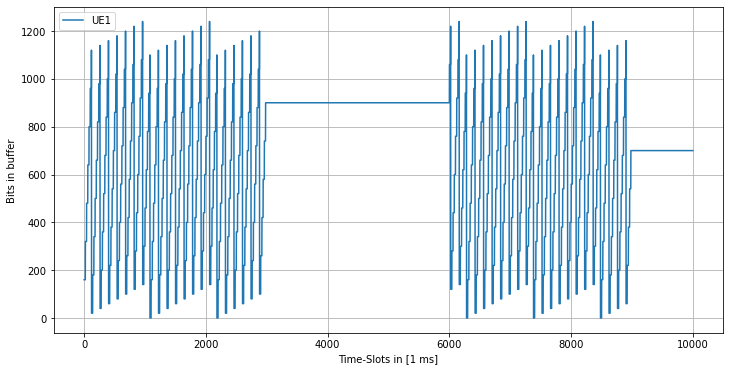

In [18]:
plt.figure(figsize=(12,6))
plt.plot(ue_list[0].mon.keys(),ue_list[0].mon.values(),label='UE1')
#plt.plot(ue_list[1].mon.keys(),ue_list[1].mon.values(),label='UE2')
#plt.plot(ue_list[2].mon.keys(),ue_list[2].mon.values(),label='UE3')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

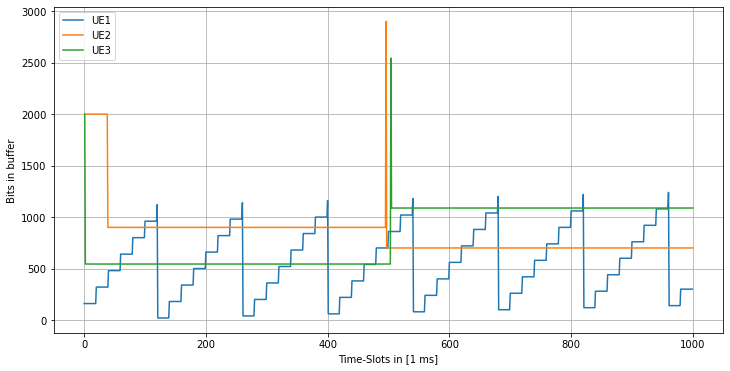

In [15]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_list[0].mon.keys())[:1000],list(ue_list[0].mon.values())[:1000],label='UE1')
plt.plot(list(ue_list[1].mon.keys())[:1000],list(ue_list[1].mon.values())[:1000],label='UE2')
plt.plot(list(ue_list[2].mon.keys())[:1000],list(ue_list[2].mon.values())[:1000],label='UE3')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')